In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Generate series from start of 2000 to end of 2020
series = pd.date_range(start='2000-01-01', end='2020-12-31', freq='D')
series = pd.DataFrame(series,columns=['date'])
# assign random number to the time series
series['data'] = np.random.randn(len(series))
series.set_index(series.date,inplace=True)

In [16]:
series.drop(columns=['date'],inplace=True)
series

,data
date,
2000-01-01,1.263736
2000-01-02,0.907846
2000-01-03,-0.082058
2000-01-04,0.127593
2000-01-05,-0.794778
...,...
2020-12-27,-1.169094
2020-12-28,-0.037993
2020-12-29,0.349311


Text(0, 0.5, 'Artifical Data')

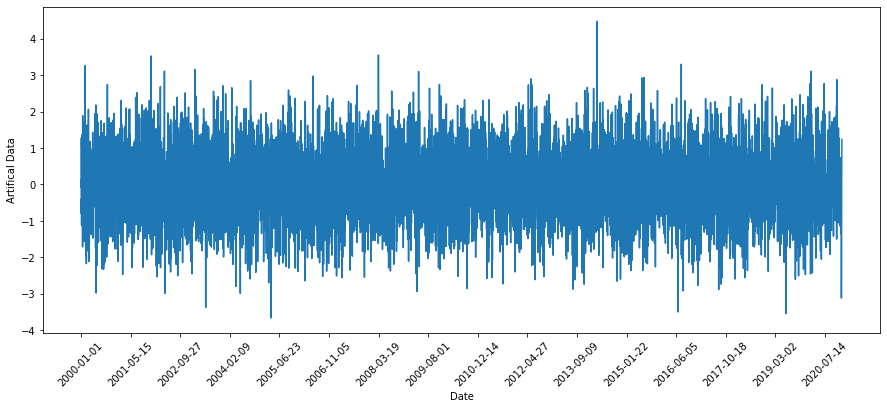

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(series['data'])
x = series.index
plt.xticks(x[::500],rotation=45)
plt.xlabel('Date')
plt.ylabel('Artifical Data')

In [28]:
series.describe()

,data
count,7671.000000
mean,-0.007089
std,0.981770
min,-3.660254
25%,-0.676509
50%,-0.001167
75%,0.670207
max,4.474008


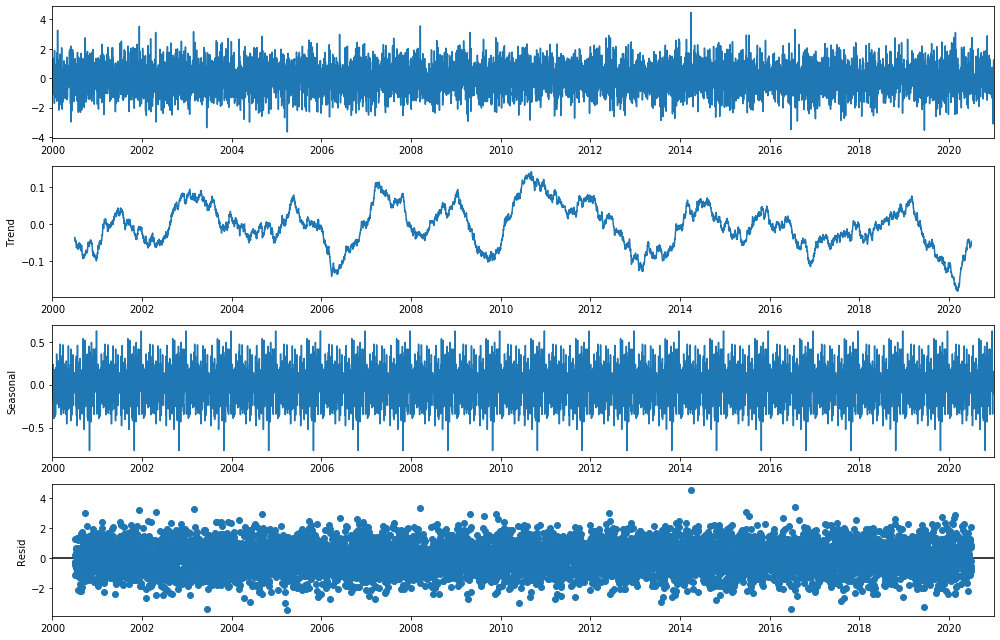

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 9

result = seasonal_decompose(series,period=365)
result.plot()
plt.show()

### By forcing the method to take a period of 1 year (365 days), we get a trendline. The trend is a simple moving average of the original series with a window length = periods = 365 days, and it seems like a more applicable time-series data. So I extract the trend as our final artificial dataset.

In [64]:
trend = result.trend
trend = trend.dropna()

Text(0, 0.5, 'Artifical Data')

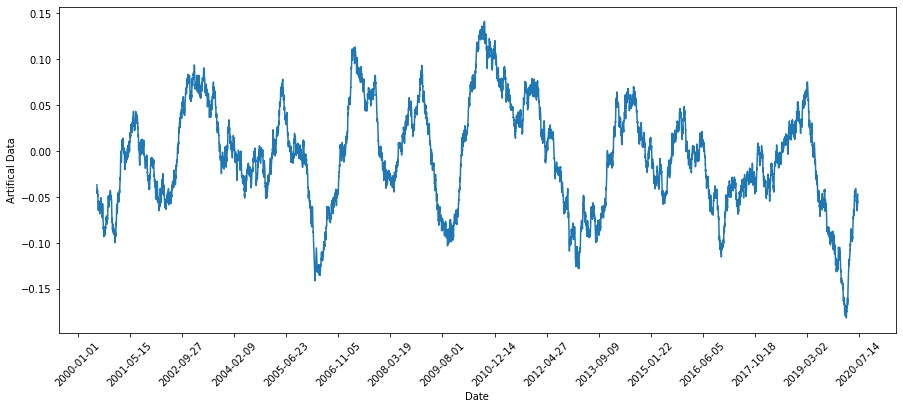

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(trend)
x = series.index
plt.xticks(x[::500],rotation=45)
plt.xlabel('Date')
plt.ylabel('Artifical Data')

In [54]:
trend.describe()

count    7307.000000
mean       -0.006673
std         0.057282
min        -0.181630
25%        -0.046567
50%        -0.005817
75%         0.033535
max         0.141307
Name: trend, dtype: float64

In [65]:
trend = pd.DataFrame(trend)
trend.to_csv('Artificial_trend.csv')